# Module 1: Data Acquisition & Preprocessing

## Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
electronics = pd.read_json('electronics.json')

## Data Cleaning

In [3]:
# Check for duplicates
duplicates = electronics.duplicated()
if duplicates.any():
    electronics = electronics[~duplicates]
electronics.replace("",np.nan, inplace=True)
electronics.replace("Hidden",np.nan, inplace=True)
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    956 non-null    object
 1   Age                            960 non-null    object
 2   Gender                         952 non-null    object
 3   Income_Level                   950 non-null    object
 4   Address                        953 non-null    object
 5   Transaction_ID                 950 non-null    object
 6   Purchase_Date                  952 non-null    object
 7   Product_ID                     951 non-null    object
 8   Product_Category               940 non-null    object
 9   Brand                          942 non-null    object
 10  Purchase_Amount                951 non-null    object
 11  Average_Spending_Per_Purchase  960 non-null    object
 12  Purchase_Frequency_Per_Month   945 non-null    object
 13  Bran

In [4]:
# #dropping rows with missing Customer_ID
# electronics.dropna(subset=['Customer_ID'], inplace=True)
# electronics['Customer_ID']=electronics['Customer_ID'].astype(str)
nan_customerid=electronics['Customer_ID'].isna()
count=1
for x in electronics.index:
    if pd.isna(electronics.loc[x,'Customer_ID']):
       electronics.loc[x,'Customer_ID']=f'Unknown{count}'
       count+=1



In [5]:
#Age
electronics['Age'] = pd.to_numeric(electronics['Age'], errors='coerce')
electronics['Age'].fillna(electronics['Age'].mean(),inplace=True)
electronics['Age'] = electronics['Age'].round().astype(int)

#Purchaseamount
electronics['Purchase_Amount'] = pd.to_numeric(electronics['Purchase_Amount'], errors='coerce')
electronics['Purchase_Amount'].fillna(electronics['Purchase_Amount'].mean(),inplace=True)
electronics['Purchase_Amount'] = electronics['Purchase_Amount'].round().astype(int)

#Average_Spending_per_month
electronics['Average_Spending_Per_Purchase'] = pd.to_numeric(electronics['Average_Spending_Per_Purchase'], errors='coerce')
electronics['Average_Spending_Per_Purchase'].fillna(electronics['Average_Spending_Per_Purchase'].mean(),inplace=True)
electronics['Average_Spending_Per_Purchase'] = electronics['Average_Spending_Per_Purchase'].round().astype(int)

#Purchase_Frequency_Per_Month
electronics['Purchase_Frequency_Per_Month'] = pd.to_numeric(electronics['Purchase_Frequency_Per_Month'], errors='coerce')
electronics['Purchase_Frequency_Per_Month'].fillna(electronics['Purchase_Frequency_Per_Month'].mean(),inplace=True)
electronics['Purchase_Frequency_Per_Month'] = electronics['Purchase_Frequency_Per_Month'].round().astype(int)

#Brand_Affinity_Score
electronics['Brand_Affinity_Score'] = pd.to_numeric(electronics['Brand_Affinity_Score'], errors='coerce')
electronics['Brand_Affinity_Score'].fillna(electronics['Brand_Affinity_Score'].mean(),inplace=True)
electronics['Brand_Affinity_Score'] = electronics['Brand_Affinity_Score'].round().astype(int)

#Purchase_Date
electronics['Purchase_Date'] = pd.to_datetime(electronics['Purchase_Date']).dt.date
electronics['Purchase_Date'].fillna(method="ffill",inplace=True)

#Month
electronics['Month'].fillna(method="ffill",inplace=True)
electronics['Month']=electronics['Month'].astype(int)

#Year
electronics['Year'].fillna(method="ffill",inplace=True)
electronics['Year']=electronics['Year'].astype(int)

In [6]:

#Gender
electronics['Gender'].fillna('Unknown',inplace=True)
electronics['Gender']=electronics['Gender'].astype(str)

#Income_Level
electronics['Income_Level'].fillna('Unknown',inplace=True)
electronics['Income_Level']=electronics['Income_Level'].astype(str)


#Address
electronics['Address'].fillna('Unknown',inplace=True)
electronics['Address']=electronics['Address'].astype(str)
electronics['Address'] = electronics['Address'].str.replace('\n', ' ').str.strip()

#Transaction_ID
electronics['Transaction_ID'].fillna('Unknown',inplace=True)
electronics['Transaction_ID']=electronics['Transaction_ID'].astype(str)

#Product_ID
electronics['Product_ID'].fillna('Unknown',inplace=True)
electronics['Product_ID']=electronics['Product_ID'].astype(str)

#Product_Category
electronics['Product_Category'].fillna('Unknown',inplace=True)
electronics['Product_Category']=electronics['Product_Category'].astype(str)

#Brand
electronics['Brand'].fillna('Unknown',inplace=True)
electronics['Brand']=electronics['Brand'].astype(str)

#Product_Category_Preferences
electronics['Product_Category_Preferences'].fillna('Unknown',inplace=True)
electronics['Product_Category_Preferences']=electronics['Product_Category_Preferences'].astype(str)

#Season
electronics['Season'].fillna('Unknown',inplace=True)
electronics['Season']=electronics['Season'].astype(str)

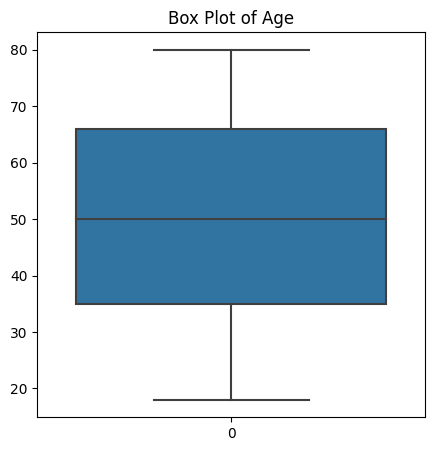

In [7]:
plt.figure(figsize=(5, 5))
sns.boxplot(electronics['Age'])
plt.title('Box Plot of Age')
plt.show()

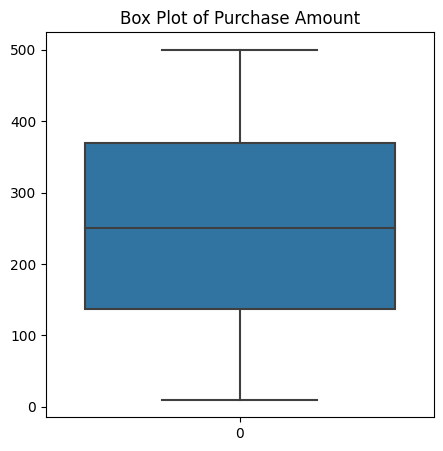

In [8]:
plt.figure(figsize=(5, 5))
sns.boxplot(electronics['Purchase_Amount'])
plt.title('Box Plot of Purchase Amount')
plt.show()

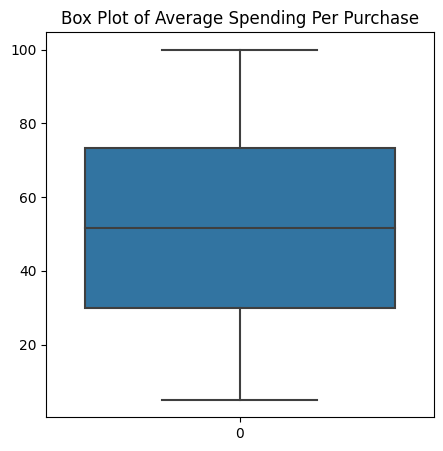

In [9]:
plt.figure(figsize=(5, 5))
sns.boxplot(electronics['Average_Spending_Per_Purchase'])
plt.title('Box Plot of Average Spending Per Purchase')
plt.show()

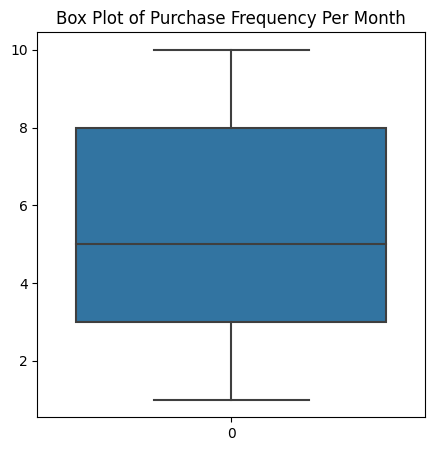

In [10]:
plt.figure(figsize=(5, 5))
sns.boxplot(electronics['Purchase_Frequency_Per_Month'])
plt.title('Box Plot of Purchase Frequency Per Month')
plt.show()


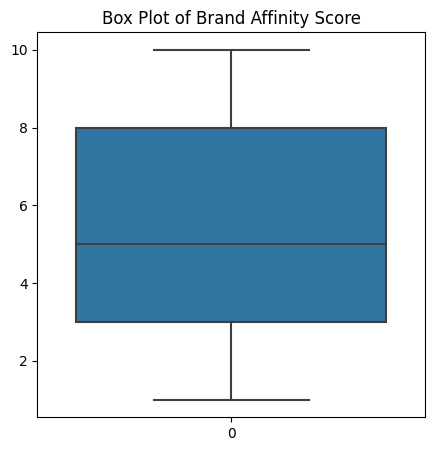

In [11]:
plt.figure(figsize=(5, 5))
sns.boxplot(electronics['Brand_Affinity_Score'])
plt.title('Box Plot of Brand Affinity Score')
plt.show()

## Data Transformation

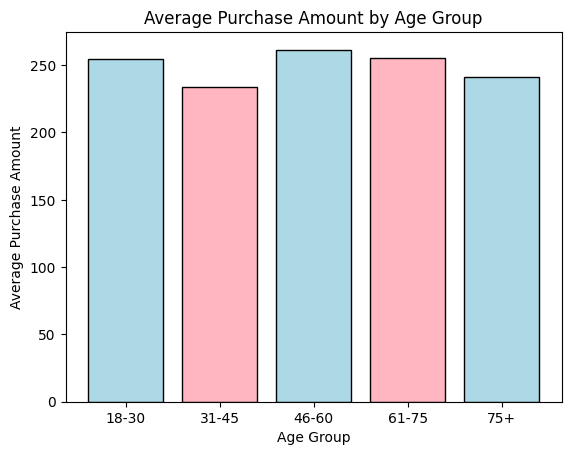

In [12]:
#Average Purchase Amount by Age Group
bins = [ 18, 30, 45, 60,75, 100]
labels = [ '18-30', '31-45', '46-60', '61-75', '75+']
electronics['Age_Group'] = pd.cut(electronics['Age'], bins=bins, labels=labels, right=False)

average_purchase_by_age = electronics.groupby('Age_Group')['Purchase_Amount'].mean()

plt.bar(average_purchase_by_age.index, average_purchase_by_age,ec='black',color=['lightblue','lightpink'])
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Age Group')
plt.show()

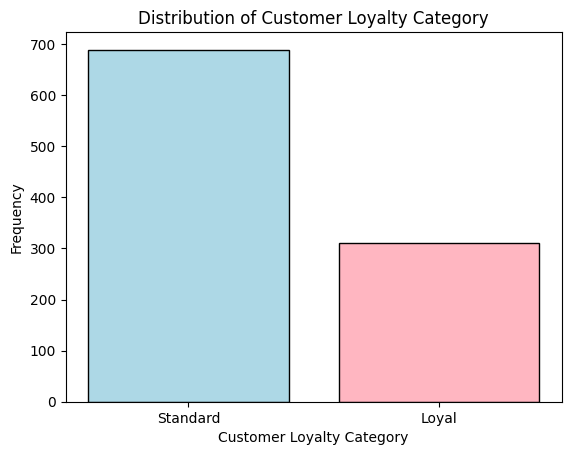

In [13]:
electronics['Customer_Loyalty'] = 'Standard'
electronics.loc[(electronics['Purchase_Frequency_Per_Month'] >= 5) & 
        (electronics['Average_Spending_Per_Purchase'] >= 50),
        'Customer_Loyalty'] = 'Loyal'
customerloyalty_counts=electronics['Customer_Loyalty'].value_counts()
plt.bar(customerloyalty_counts.index, customerloyalty_counts.values,ec='black',color=['lightblue','lightpink'])
plt.xlabel('Customer Loyalty Category')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Loyalty Category')
plt.show()

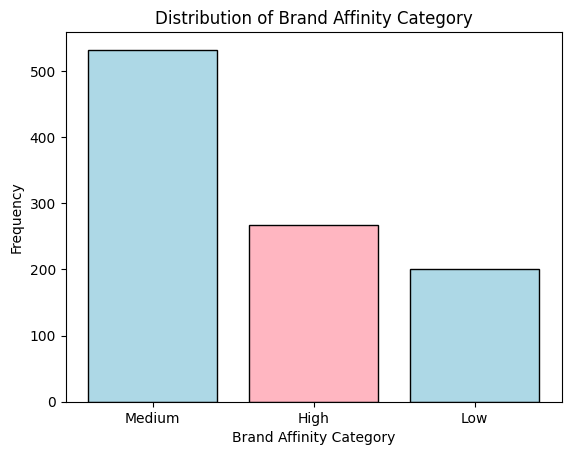

In [14]:
electronics['Brand_Affinity_Category'] = pd.cut(electronics['Brand_Affinity_Score'],
                                       bins=[0, 3, 8, 11],
                                       labels=['Low', 'Medium', 'High'],
                                       right=False)

category_counts=electronics['Brand_Affinity_Category'].value_counts()
plt.bar(category_counts.index, category_counts.values,ec='black',color=['lightblue','lightpink'])
plt.xlabel('Brand Affinity Category')
plt.ylabel('Frequency')
plt.title('Distribution of Brand Affinity Category')
plt.show()

In [15]:
#Standardizing int & float columns
temp_electronics=electronics.copy()
cols = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase','Purchase_Frequency_Per_Month','Brand_Affinity_Score']
scaler = StandardScaler()
temp_electronics[cols] = scaler.fit_transform(temp_electronics[cols])

# Module 2: Exploratory Data Analysis (EDA)

## Univariate Analysis

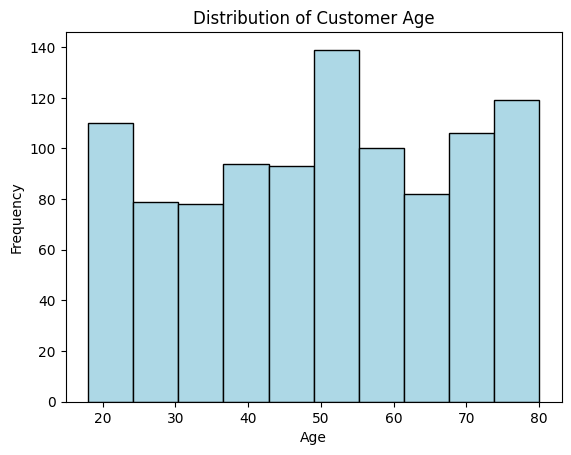

Skewness for Age: -0.06233976988341373


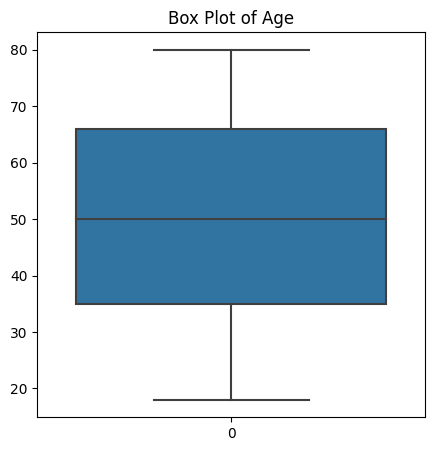

There are no outliers in the data.
count    1000.000000
mean       49.890000
std        18.108501
min        18.000000
25%        35.000000
50%        50.000000
75%        66.000000
max        80.000000
Name: Age, dtype: float64


In [16]:
#Distribution of age
plt.hist(electronics['Age'],bins=10,ec='black',color=['lightblue'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()
skewness =electronics['Age'].skew()
print(f"Skewness for Age: {skewness}")
Q1 = electronics['Age'].quantile(0.25)
Q3 = electronics['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (electronics['Age'] < lower_bound) | (electronics['Age'] > upper_bound)
outliers_df = electronics[outliers]
plt.figure(figsize=(5, 5))
sns.boxplot(electronics['Age'])
plt.title('Box Plot of Age')
plt.show()
if (outliers_df.empty):
    print("There are no outliers in the data.")
else:
    print(outliers_df)
print(electronics['Age'].describe())

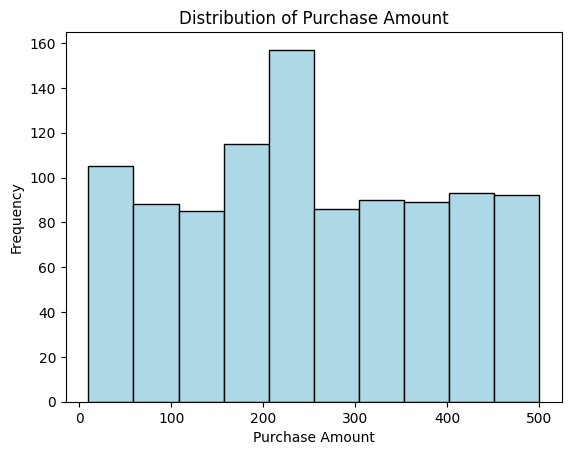

Skewness for Purchase Amount: 0.04379707800921364


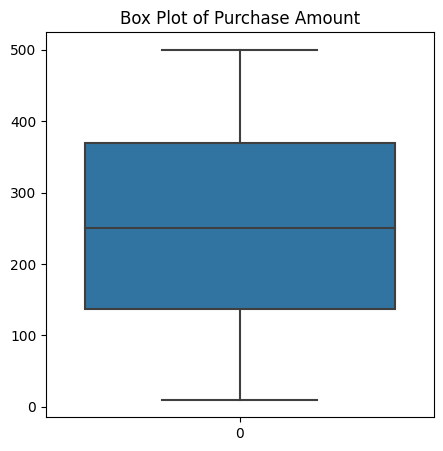

There are no outliers.
count    1000.000000
mean      250.648000
std       137.515179
min        10.000000
25%       137.000000
50%       251.000000
75%       369.000000
max       500.000000
Name: Purchase_Amount, dtype: float64


In [17]:
#Distribution of Purchase Amount
plt.hist(electronics['Purchase_Amount'],bins=10,ec='black',color=['lightblue'])
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount')
plt.show()
skewness =electronics['Purchase_Amount'].skew()
print(f"Skewness for Purchase Amount: {skewness}")

#Boxplot of purchase amount
plt.figure(figsize=(5, 5))
sns.boxplot(electronics['Purchase_Amount'])
plt.title('Box Plot of Purchase Amount')
plt.show()
Q1 = electronics['Purchase_Amount'].quantile(0.25)
Q3 = electronics['Purchase_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (electronics['Purchase_Amount'] < lower_bound) | (electronics['Purchase_Amount'] > upper_bound)
outliers_df = electronics[outliers]
if (outliers_df.empty):
    print("There are no outliers.")
else:
    print(outliers_df)

print(electronics['Purchase_Amount'].describe())

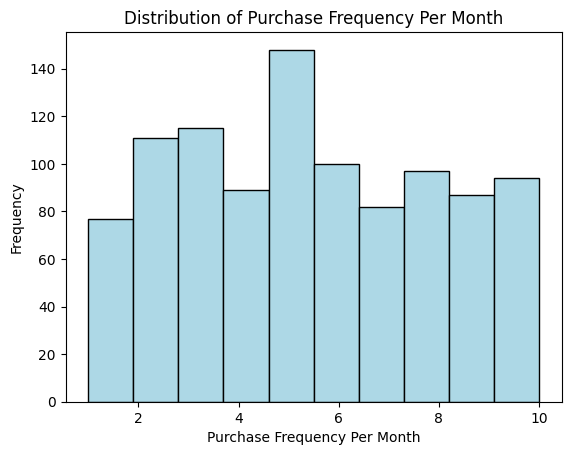

Skewness for Purchase Frequency Per Month: 0.10442232969454551


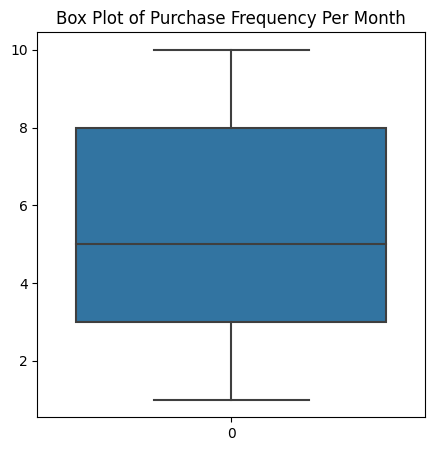

There are no outliers.


count    1000.000000
mean        5.413000
std         2.767687
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Purchase_Frequency_Per_Month, dtype: float64

In [18]:
#Distribution of Purchase Frequency Per Amount
plt.hist(electronics['Purchase_Frequency_Per_Month'],bins=10,ec='black',color=['lightblue'])
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Frequency Per Month')
plt.show()
skewness =electronics['Purchase_Frequency_Per_Month'].skew()
print(f"Skewness for Purchase Frequency Per Month: {skewness}")

#Boxplot of purchase amount
plt.figure(figsize=(5, 5))
sns.boxplot(electronics['Purchase_Frequency_Per_Month'])
plt.title('Box Plot of Purchase Frequency Per Month')
plt.show()
Q1 = electronics['Purchase_Frequency_Per_Month'].quantile(0.25)
Q3 = electronics['Purchase_Frequency_Per_Month'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (electronics['Purchase_Frequency_Per_Month'] < lower_bound) | (electronics['Purchase_Frequency_Per_Month'] > upper_bound)
outliers_df = electronics[outliers]
if (outliers_df.empty):
    print("There are no outliers.")
else:
    print(outliers_df)

electronics['Purchase_Frequency_Per_Month'].describe()

## Bivariate Analysis

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


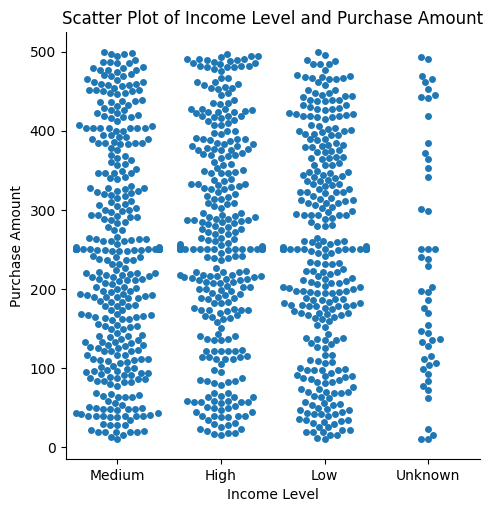

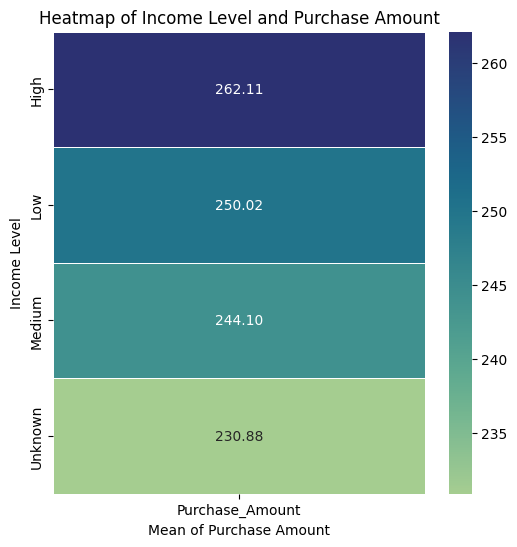

In [20]:
sns.catplot(x= electronics['Income_Level'], y=electronics['Purchase_Amount'],kind='swarm')
plt.title("Scatter Plot of Income Level and Purchase Amount")
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')

pivot_table = electronics.pivot_table(values='Purchase_Amount', index='Income_Level', aggfunc='mean')

plt.figure(figsize=(6, 6))
sns.heatmap(pivot_table, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title("Heatmap of Income Level and Purchase Amount")
plt.xlabel('Mean of Purchase Amount')
plt.ylabel('Income Level')
plt.show()

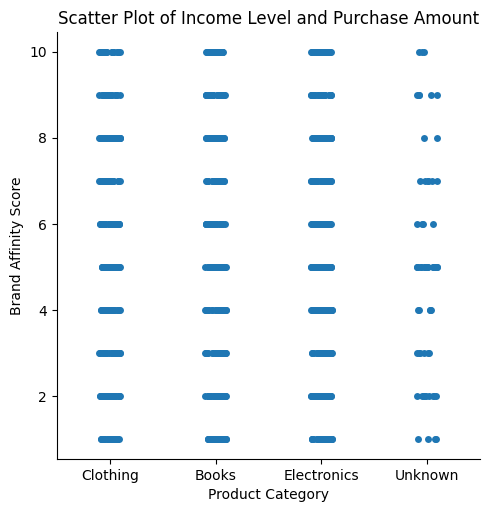

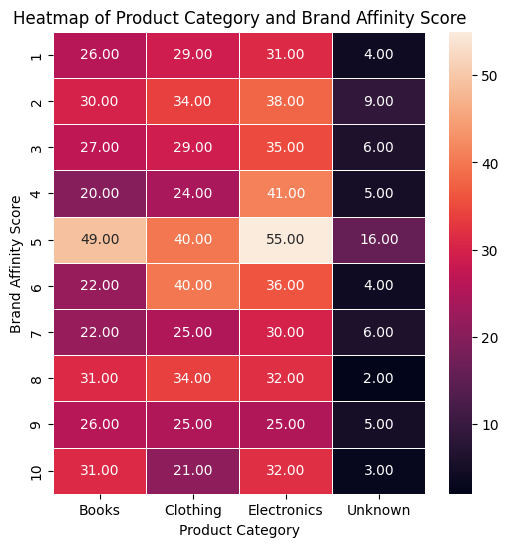

In [21]:
sns.catplot(x= electronics['Product_Category'], y=electronics['Brand_Affinity_Score'],kind='strip')
plt.title("Scatter Plot of Income Level and Purchase Amount")
plt.xlabel('Product Category')
plt.ylabel('Brand Affinity Score')

pivot_table = electronics.pivot_table(index='Brand_Affinity_Score', columns='Product_Category',aggfunc='size')

plt.figure(figsize=(6, 6))
sns.heatmap(pivot_table, annot=True, cmap='rocket', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Product Category and Brand Affinity Score")
plt.xlabel('Product Category')
plt.ylabel('Brand Affinity Score')
plt.show()

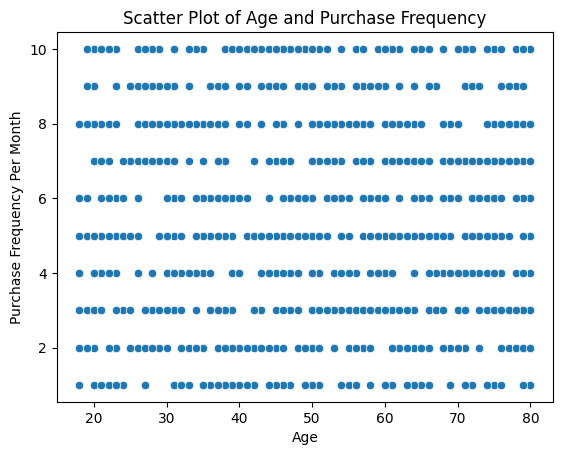

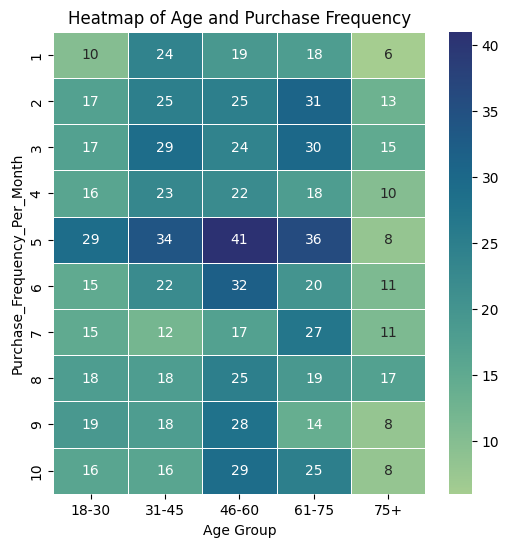

In [22]:
sns.scatterplot(x= electronics['Age'], y=electronics['Purchase_Frequency_Per_Month'])
plt.title("Scatter Plot of Age and Purchase Frequency")
plt.xlabel('Age')
plt.ylabel('Purchase Frequency Per Month')

pivot_table_age = electronics.pivot_table( index='Purchase_Frequency_Per_Month',columns='Age_Group', aggfunc='size')
plt.figure(figsize=(6,6))
sns.heatmap(pivot_table_age, cmap='crest', annot=True, linewidths=.5)
plt.title("Heatmap of Age and Purchase Frequency")
plt.xlabel('Age Group')
plt.show()

In [23]:
print('There does not exist a strong relationship among the columns')
electronics[['Age','Purchase_Amount','Average_Spending_Per_Purchase','Purchase_Frequency_Per_Month','Brand_Affinity_Score']].corr()

There does not exist a strong relationship among the columns


,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score
Age,1.000000,0.006068,-0.049052,-0.005963,0.016205
Purchase_Amount,0.006068,1.000000,-0.016006,0.017601,0.023872
Average_Spending_Per_Purchase,-0.049052,-0.016006,1.000000,-0.027628,-0.031444
Purchase_Frequency_Per_Month,-0.005963,0.017601,-0.027628,1.000000,0.049156
Brand_Affinity_Score,0.016205,0.023872,-0.031444,0.049156,1.000000


## Temporal Analysis

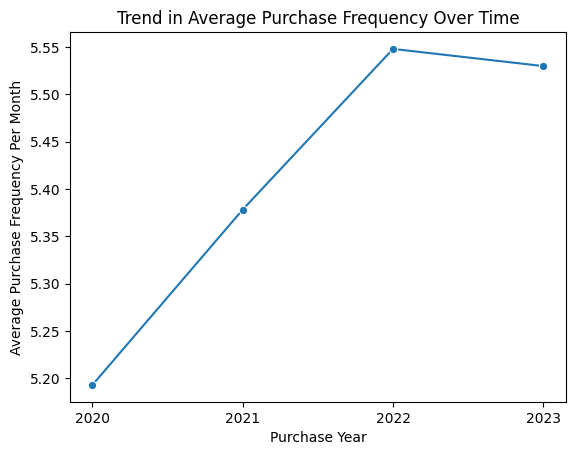

In [24]:
electronics['Purchase_Year'] = pd.to_datetime(electronics['Purchase_Date']).dt.year
grouped_data = electronics.groupby(['Purchase_Year'])['Purchase_Frequency_Per_Month'].mean().reset_index(name='Average_Frequency')
sns.lineplot(data=grouped_data, x='Purchase_Year', y='Average_Frequency', marker='o')
plt.xticks(grouped_data['Purchase_Year'])
plt.xlabel('Purchase Year')
plt.ylabel('Average Purchase Frequency Per Month')
plt.title('Trend in Average Purchase Frequency Over Time')
plt.show()

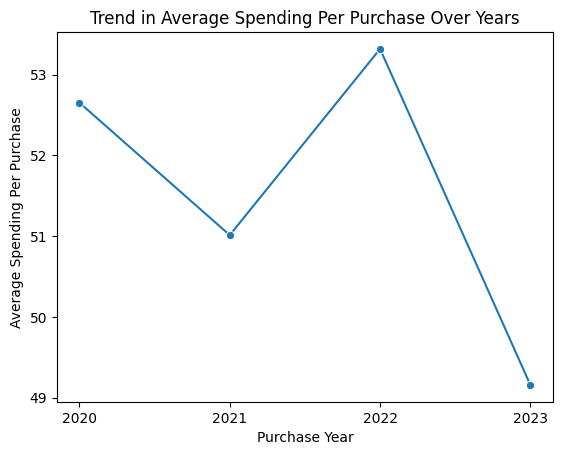

In [25]:
electronics['Purchase_Year'] = pd.to_datetime(electronics['Purchase_Date']).dt.year
grouped_data = electronics.groupby(['Purchase_Year'])['Average_Spending_Per_Purchase'].mean().reset_index(name='average_spending')
# Use 'mean()' instead of 'size()' to get the average value instead of the group size
sns.lineplot(data=grouped_data, x='Purchase_Year', y='average_spending', marker='o')
plt.xticks(grouped_data['Purchase_Year'])
plt.xlabel('Purchase Year')
plt.ylabel('Average Spending Per Purchase')
plt.title('Trend in Average Spending Per Purchase Over Years')
plt.show()


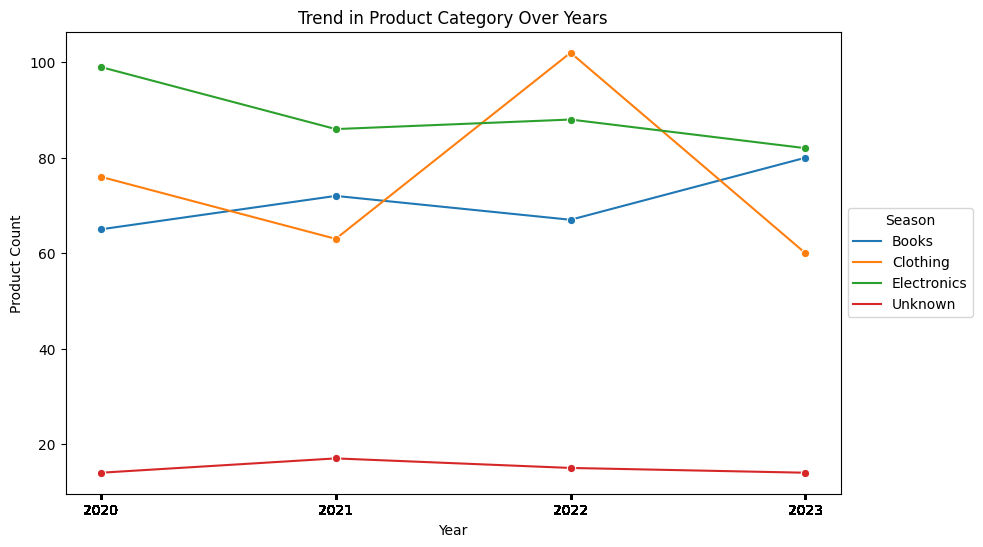

In [26]:
electronics['Purchase_Year'] = pd.to_datetime(electronics['Purchase_Date']).dt.year
grouped_chart = electronics.groupby(['Purchase_Year', 'Product_Category']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_chart,x='Purchase_Year', y='count', hue='Product_Category', marker='o')
plt.title('Trend in Product Category Over Years')
plt.xlabel('Year')
plt.ylabel('Product Count')
plt.xticks(electronics['Purchase_Year'])
plt.legend(title='Season', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

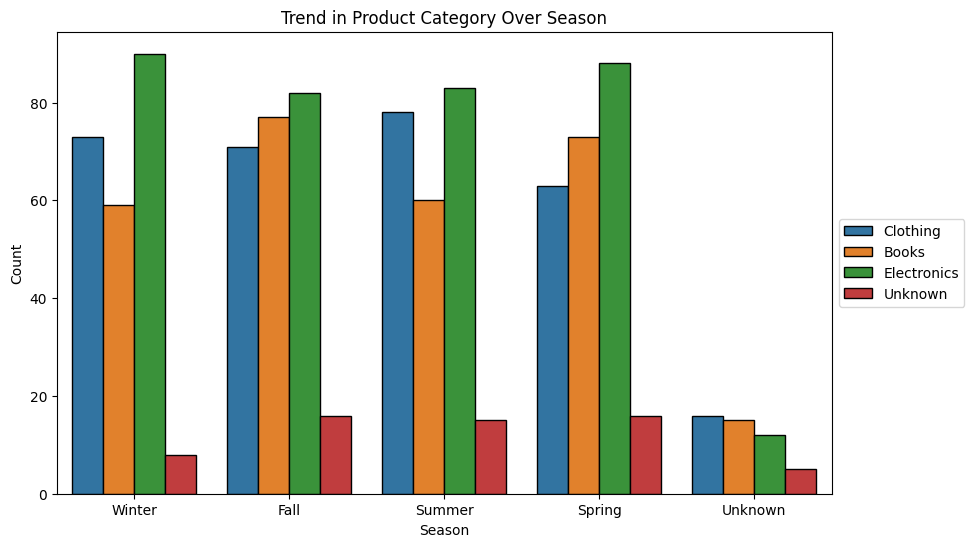

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Product_Category', data=electronics,ec='black')
plt.title('Trend in Product Category Over Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

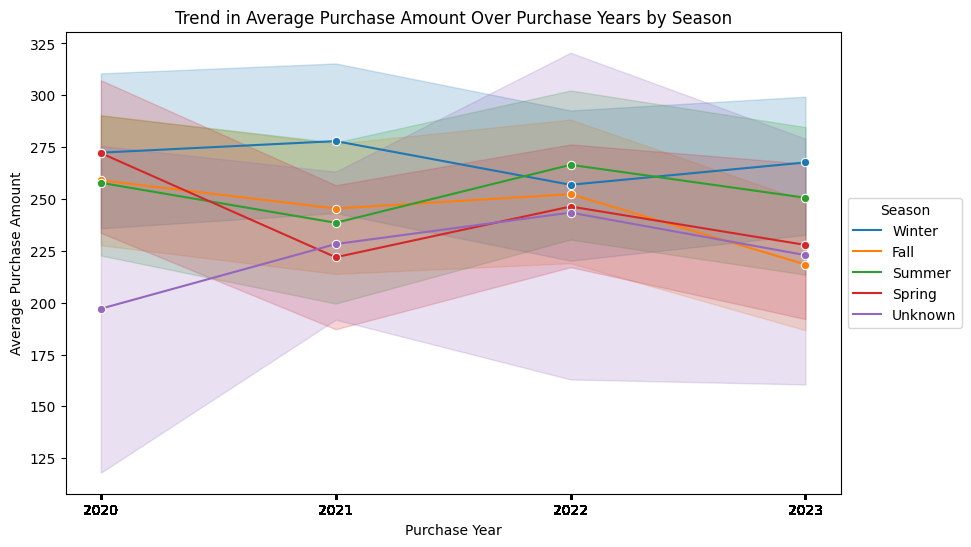

In [28]:
electronics['Purchase_Year'] = pd.to_datetime(electronics['Purchase_Date']).dt.year
plt.figure(figsize=(10, 6))
sns.lineplot(data=electronics,x='Purchase_Year', y='Purchase_Amount', hue='Season', marker='o', estimator='mean')
plt.title('Trend in Average Purchase Amount Over Purchase Years by Season')
plt.xlabel('Purchase Year')
plt.ylabel('Average Purchase Amount')
plt.xticks(electronics['Purchase_Year'])
plt.legend(title='Season', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Module 3: Clustering Analysis

## K-Means Clustering

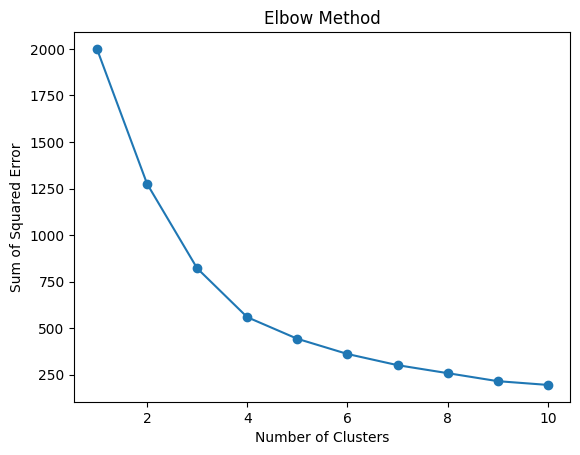

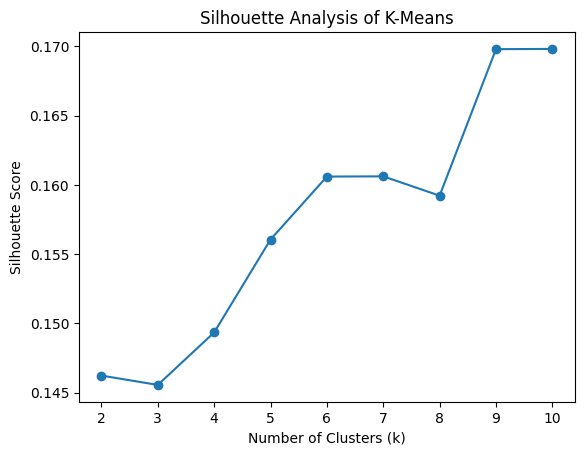

In [29]:
sum_of_squared_error=[]
silhouette_scores=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(temp_electronics[['Purchase_Amount','Brand_Affinity_Score']])
    sum_of_squared_error.append(kmeans.inertia_)


plt.plot(range(1, 11), sum_of_squared_error, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(temp_electronics[cols])
    silhouette_scores.append(silhouette_score(temp_electronics[cols], kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis of K-Means')
plt.show()

chosen_k = 4 

              Age  Purchase_Amount  Average_Spending_Per_Purchase  \
Cluster                                                             
0        0.080130         1.001294                      -0.082494   
1       -0.063906        -0.733680                       0.025716   
2        0.008686         0.974364                       0.027936   
3        0.010735        -0.717106                       0.004394   

         Purchase_Frequency_Per_Month  Brand_Affinity_Score  
Cluster                                                      
0                            0.058893              0.968514  
1                           -0.047161             -0.778027  
2                           -0.025179             -0.766095  
3                            0.036298              0.914147  


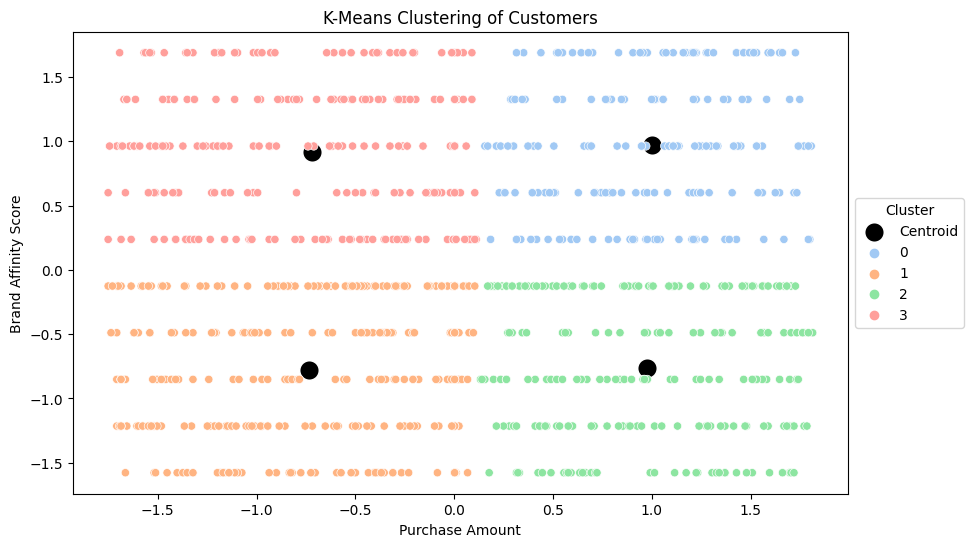

In [30]:
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
temp_electronics['Cluster'] = kmeans.fit_predict(temp_electronics[['Purchase_Amount','Brand_Affinity_Score']])
centroids = kmeans.cluster_centers_
cluster_characteristics = temp_electronics.groupby('Cluster')[cols].mean()
print(cluster_characteristics)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='o', s=200, color='black', label='Centroid')
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', hue='Cluster', data=temp_electronics, palette='pastel')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Purchase Amount')
plt.ylabel('Brand Affinity Score')
plt.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [31]:
print(cluster_characteristics)
tmp = cluster_characteristics['Purchase_Amount'].idxmax()
tmp2 = cluster_characteristics['Brand_Affinity_Score'].idxmax()

print(f'Cluster {tmp} has a higher average purchase amount.\nCluster {tmp2} has a strong brand affinity.\n')


              Age  Purchase_Amount  Average_Spending_Per_Purchase  \
Cluster                                                             
0        0.080130         1.001294                      -0.082494   
1       -0.063906        -0.733680                       0.025716   
2        0.008686         0.974364                       0.027936   
3        0.010735        -0.717106                       0.004394   

         Purchase_Frequency_Per_Month  Brand_Affinity_Score  
Cluster                                                      
0                            0.058893              0.968514  
1                           -0.047161             -0.778027  
2                           -0.025179             -0.766095  
3                            0.036298              0.914147  
Cluster 0 has a higher average purchase amount.
Cluster 0 has a strong brand affinity.



## DBSCAN Clustering

In [32]:
eps_values = [0.1, 0.3, 0.5, 1.0, 2.0]

min_values = [5, 10, 15]

best_epsilon = None
best_min_samples = None
bestsilhouette_score = -1
best_clusters = None
for eps in eps_values:
    for minvalues in min_values:
        dbscan = DBSCAN(eps=eps, min_samples=minvalues)
        clusters = dbscan.fit_predict(temp_electronics[cols])
        # print(clusters)
        if len(set(clusters)) > 1:
            score = silhouette_score(temp_electronics[cols], clusters)
            print("Epsilon:",eps,"\tMin_pts:",minvalues,'\tSilhouette Score:',score)
            if score > bestsilhouette_score:
                bestsilhouette_score = score
                best_epsilon = eps
                best_min_samples = minvalues
                best_clusters = clusters
        

print("Optimal parameters") 
print("Epsilon=",best_epsilon) 
print("Min Values=",best_min_samples)
print("BestClusters",np.unique(best_clusters))

Epsilon: 1.0 	Min_pts: 5 	Silhouette Score: 0.005926287785490338
Epsilon: 1.0 	Min_pts: 10 	Silhouette Score: -0.18287028349303164
Epsilon: 1.0 	Min_pts: 15 	Silhouette Score: -0.11052817061311945
Optimal parameters
Epsilon= 1.0
Min Values= 5
BestClusters [-1  0  1]


Epsilon: 0.1 	Min_pts: 5 	Silhouette Score: 0.41929351775501733
Epsilon: 0.1 	Min_pts: 10 	Silhouette Score: -0.2649303943713525
Epsilon: 0.1 	Min_pts: 15 	Silhouette Score: -0.3268023744247397
Optimal parameters
Epsilon= 0.1
Min Values= 5
BestClusters [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
Number of Clusters for Purchase Amount and Brand Affinity Score: 72


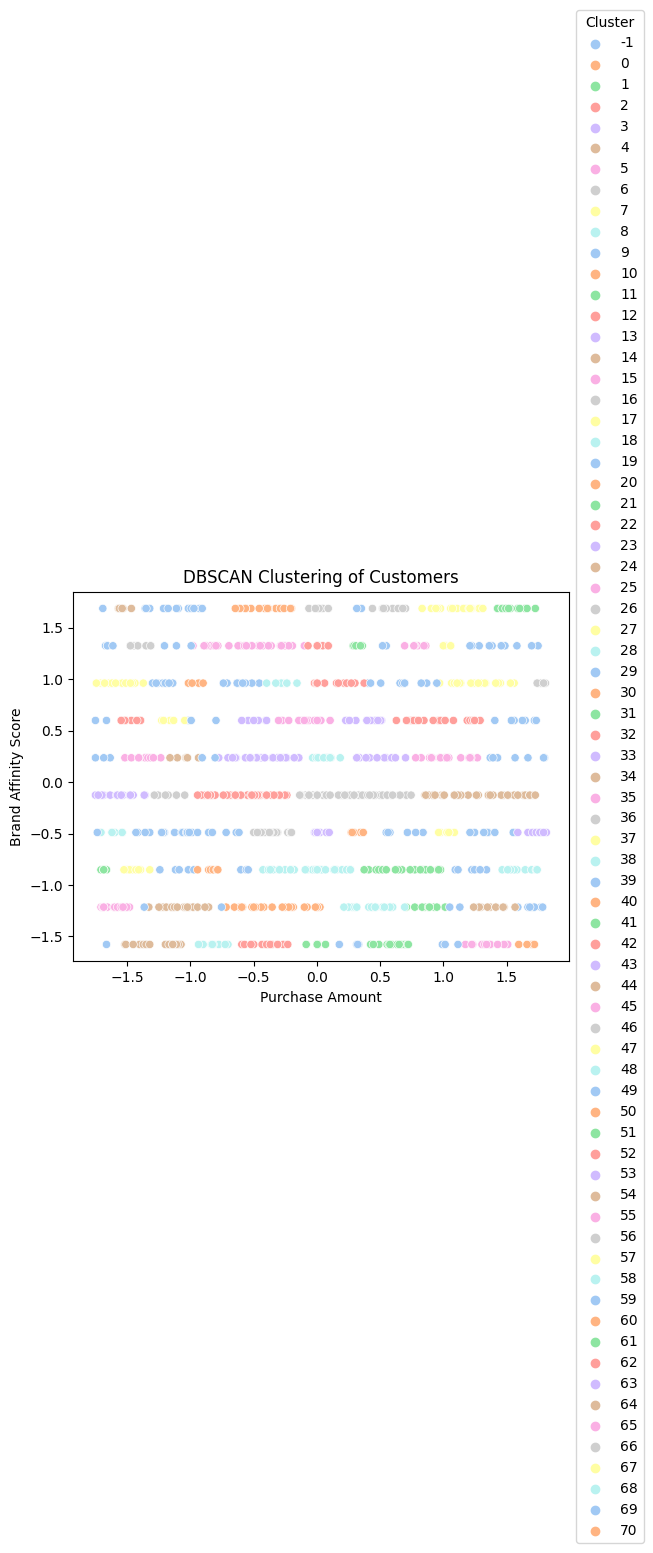

In [33]:
eps_values = [0.1,1,10]
min_values = [5, 10, 15]

best_epsilon = None
best_min_samples = None
bestsilhouette_score = -1
best_clusters = None
for eps in eps_values:
    for minvalues in min_values:
        dbscan = DBSCAN(eps=eps, min_samples=minvalues)
        clusters = dbscan.fit_predict(temp_electronics[['Purchase_Amount','Brand_Affinity_Score']])
        # print(clusters)
        if len(set(clusters)) > 1:
            score = silhouette_score(temp_electronics[['Purchase_Amount','Brand_Affinity_Score']], clusters)
            print("Epsilon:",eps,"\tMin_pts:",minvalues,'\tSilhouette Score:',score)
            if score > bestsilhouette_score:
                bestsilhouette_score = score
                best_epsilon = eps
                best_min_samples = minvalues
                best_clusters = clusters
        

print("Optimal parameters") 
print("Epsilon=",best_epsilon) 
print("Min Values=",best_min_samples)
print("BestClusters",np.unique(best_clusters))
dbscan=DBSCAN(eps=best_epsilon,min_samples=best_min_samples)
bestclusters=dbscan.fit_predict(temp_electronics[['Purchase_Amount','Brand_Affinity_Score']])
temp_electronics['DBSCAN_CLUSTERS']=bestclusters
print("Number of Clusters for Purchase Amount and Brand Affinity Score:", len(set(temp_electronics['DBSCAN_CLUSTERS'])))
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', hue='DBSCAN_CLUSTERS', data=temp_electronics, palette='pastel')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Purchase Amount')
plt.ylabel('Brand Affinity Score')
plt.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()



"

In [34]:
print("Cluster Distribution (SIZES)")
sizes=temp_electronics['DBSCAN_CLUSTERS'].value_counts().reset_index(name='Sizes')
print(sizes)

print('DBSCAN CLUSTER CHARACTERISTICS')
dbscancluster_characteristics = temp_electronics.groupby('DBSCAN_CLUSTERS')[cols].mean()
print(dbscancluster_characteristics)

print('Comparison of DBSCAN and KMeans')
print('DBSCAN Cluster Distribution')
dbscansizes=temp_electronics['DBSCAN_CLUSTERS'].value_counts().reset_index(name='Sizes')
print(sizes)
print('KMeans Cluster Distribution')
kmeansizes=temp_electronics['Cluster'].value_counts().reset_index(name='Sizes')
print(kmeansizes)

Cluster Distribution (SIZES)
    index  Sizes
0      -1     97
1       6     49
2      12     46
3      14     41
4       8     30
..    ...    ...
67     60      5
68     20      5
69     31      5
70     21      5
71     50      5

[72 rows x 2 columns]
DBSCAN CLUSTER CHARACTERISTICS
                      Age  Purchase_Amount  Average_Spending_Per_Purchase  \
DBSCAN_CLUSTERS                                                             
-1               0.101199         0.121970                      -0.014387   
 0              -0.035360        -0.540075                      -0.048436   
 1               0.144203         0.598118                       0.173123   
 2              -0.011188        -0.400778                      -0.251719   
 3              -0.314374         0.027298                       0.620905   
...                   ...              ...                            ...   
 66              0.220173        -1.400713                      -0.357677   
 67              0.9

## K-Means++ Clustering

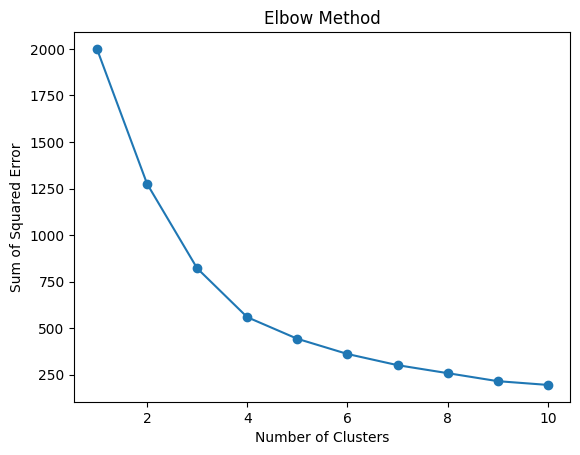

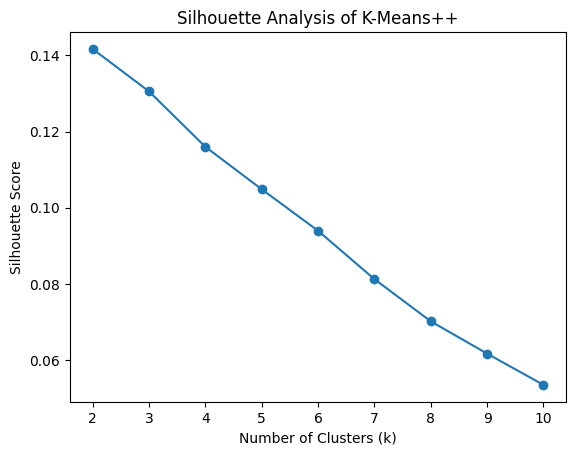

In [35]:
sum_of_squared_error=[]
silhouette_scores=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(temp_electronics[['Purchase_Amount','Brand_Affinity_Score']])
    sum_of_squared_error.append(kmeans.inertia_)


plt.plot(range(1, 11), sum_of_squared_error, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(temp_electronics[['Purchase_Amount','Brand_Affinity_Score']])
    silhouette_scores.append(silhouette_score(temp_electronics[cols], kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis of K-Means++')
plt.show()

chosen_k = 4

Common clusters:      Cluster  Cluster_KMeans++
0          1                 1
1          2                 2
2          1                 1
3          1                 1
4          2                 2
..       ...               ...
995        1                 1
996        1                 1
997        3                 3
998        3                 3
999        1                 1

[1000 rows x 2 columns]
Number of iterations in K-Means: 12
Number of iterations in K-Means++: 9


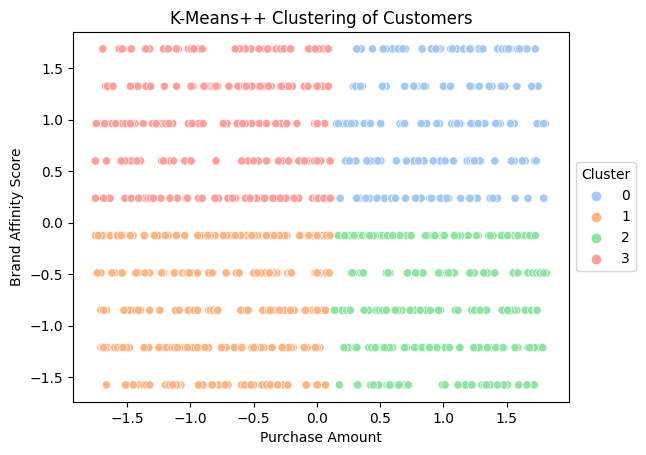

In [36]:
kmeans_plusplus = KMeans(n_clusters=chosen_k, init='k-means++', random_state=42)
temp_electronics['Cluster_KMeans++'] = kmeans_plusplus.fit_predict(temp_electronics[['Purchase_Amount','Brand_Affinity_Score']])
centroids = kmeans.cluster_centers_
compare_results = temp_electronics[['Cluster', 'Cluster_KMeans++']]
common_clusters = compare_results[compare_results['Cluster'].isin(compare_results['Cluster_KMeans++'])]
print(f"Common clusters: {common_clusters}")

print(f"Number of iterations in K-Means: {kmeans.n_iter_}")
print(f"Number of iterations in K-Means++: {kmeans_plusplus.n_iter_}")


sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', hue='Cluster_KMeans++', data=temp_electronics, palette='pastel')
plt.title('K-Means++ Clustering of Customers')
plt.xlabel('Purchase Amount')
plt.ylabel('Brand Affinity Score')
plt.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Module 4: Comparison and Conclusion

## Compare the results of all three clustering algorithms

K-Means clustering is based on minimizing the sum of squared distances of each datapoint to the centroid within the cluster. Silhouette Analysis was performed to check the effectiveness of the clustering. The number of clusters to be used for K-Means are determined by Elbow Method, which are 4. And the algorithm converged in 12 iterations. 

Advantages: Simple, computationally efficient, scales well.
Disadvantages: Highly dependent on the initialization of centroids

In DB-SCAN, first we found optimal epsilon and minimum points for the algorithm. We have used different 

Advantages: No need for defining the number of clusters
Disadvantages: Sensitive to hyperparameter tuning, may struggle with varying density.

K-Means++ clustering follows a probabilistic approach in the initialization of centroids and like K-Means, silhouette score was calculated for each possible K and the optimal value for K was chose through the Elbow Method. It produced the same number of clusters but the algorithm converged in 9 iterations and the clusters formed were more compact than the ones in K-Means.

Advantages: Addresses K-Means' sensitivity to centroids initialization.
Disadvantages: Assumes spherical clusters like K-Means, not as flexible as DBSCAN.

## Draw Conclusions and Recommendations

Customers purchased more electronic products in all seasons than other products.

Average Purchase Amount was the highest in Winter season of 2021. 

In 2022, the store had the highest purchase frequency as compared to the rest of the years.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b0000cc-7416-4460-a600-0e36bbb0562d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>